# Q1.Create SparkSession and create an RDD from a Python list of integers using PySpark.
- Display all elements of the RDD
- Find the total number of elements
- Explain why RDDs are immutable and fault tolerant

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Assignment1_PySpark_RDD") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")


26/02/04 09:10:02 WARN Utils: Your hostname, jaimin resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
26/02/04 09:10:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


26/02/04 09:10:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<h6>This cell initializes the SparkSession, which is the entry point for using Spark functionality.</h6>
<h6>The SparkContext is extracted from the SparkSession to manage the cluster resources.</h6>
<h6>The log level is set to ERROR to reduce unnecessary log messages.</h6>

In [2]:
# Create RDD from Python list
data = [1, 2, 3, 4, 5, 6]
rdd = sc.parallelize(data)

# Display all elements
print("RDD Elements:", rdd.collect())

# Total number of elements
print("Total elements:", rdd.count())

RDD Elements: [1, 2, 3, 4, 5, 6]
Total elements: 6


### Why RDDs are Immutable?
RDDs cannot be modified once created. Any transformation on an RDD creates a new RDD. 
This immutability helps Spark perform parallel execution safely.

### Why RDDs are Fault Tolerant?
RDDs store lineage information. If data is lost, Spark can recompute it using the original transformations.


<h3>Q2.Using an RDD created from numbers 1 to 10:
- Use map() to find the square of each number
- Use filter() to extract only even numbers
- Display the transformed results</h3>

In [3]:

rdd = sc.parallelize(range(1,11))

squares = rdd.map(lambda x: x*x)
# squares of the numbers 

print(squares.collect())

# extract only even numbers 

even = rdd.filter(lambda x: x%2==0)

print(even.collect())


[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[2, 4, 6, 8, 10]


# Q3. Using the same RDD:
- Use reduce() to find the sum of all elements
- Use count() to find the total number of elements
- Use take(5) to display the first five elements

In [4]:
# sum of elements

sum = rdd.reduce(lambda a,b : a+b)

total_elements = rdd.count()

first_five = rdd.take(5)

print("sum : ",sum)
print("total elements : " , total_elements ) 
print("first five elements : " , first_five)


sum :  55
total elements :  10
first five elements :  [1, 2, 3, 4, 5]


# Q4. Load a text file into an RDD and perform the following:
- Count the total number of lines
- Count the total number of words
- Find the longest word in the file

In [5]:
text_rdd = sc.textFile("untitled.txt")

line_count = text_rdd.count()

word_count = text_rdd.flatMap(lambda line: line.split()).count()

longest_word = text_rdd \
    .flatMap(lambda line: line.split()) \
    .reduce(lambda a, b: a if len(a) > len(b) else b)

print("line count : ",line_count)
print("word count : " ,word_count)
print("longest word : ", longest_word)



line count :  8
word count :  73
longest word :  traditional


# Q5.Write a PySpark program to implement Word Count using RDD:
- Convert all words to lowercase
- Count frequency of each word
- Display the top 10 most frequent words

In [6]:
# Load the text file
text_rdd = sc.textFile("untitled.txt")

# Step 1: Split lines into words and convert to lowercase
words_rdd = text_rdd.flatMap(lambda line: line.split()) \
                    .map(lambda word: word.lower())

# Step 2: Create (word, 1) pairs
word_pairs = words_rdd.map(lambda word: (word, 1))

# Step 3: Count frequency of each word
word_counts = word_pairs.reduceByKey(lambda a, b: a + b)

# Step 4: Get top 10 most frequent words
top_10_words = word_counts \
    .sortBy(lambda x: x[1], ascending=False) \
    .take(10)

# Display results
print("Top 10 most frequent words:")
for word, count in top_10_words:
    print(word, count)


Top 10 most frequent words:
spark 6
data 5
and 3
for 3
processing 3
is 2
with 2
provides 1
an 1
programming 1


<p>This program performs word frequency analysis using Spark RDD operations.
The text file is first read into an RDD, and each line is split into individual words.
All words are converted to lowercase to avoid case-sensitive duplicates.
Each word is then mapped to a key-value pair (word, 1), and the total count of each word is calculated using reduceByKey.
Finally, the words are sorted in descending order of frequency, and the top 10 most frequent words are displayed.</p>

# Q : 6

In [15]:
df = spark.read.csv(
    "searchterms.csv",
    header=True,
    inferSchema=True
)

df.show(5)
df.printSchema()


+---+-----+----+--------------+
|day|month|year|    searchterm|
+---+-----+----+--------------+
| 12|   11|2021| mobile 6 inch|
| 12|   11|2021| mobile latest|
| 12|   11|2021|   tablet wifi|
| 12|   11|2021|laptop 14 inch|
| 12|   11|2021|     mobile 5g|
+---+-----+----+--------------+
only showing top 5 rows

root
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- searchterm: string (nullable = true)



<p>This cell loads the searchterms.csv file into a Spark DataFrame.
The header=True option treats the first row as column names, and inferSchema=True automatically detects data types.
The show() and printSchema() functions are used to inspect the data and schema.</p>

# Frequency distribution for terms > threshold

In [16]:
from pyspark.sql.functions import col

term_counts = df.groupBy("searchterm").count()

popular_terms = term_counts.filter(col("count") > 100) \
                            .orderBy(col("count").desc())

popular_terms.show()


+-------------------+-----+
|         searchterm|count|
+-------------------+-----+
|      mobile 6 inch| 2312|
|          mobile 5g| 2301|
|      mobile latest| 1327|
|             laptop|  935|
|        tablet wifi|  896|
|     tablet 10 inch|  715|
|      gaming laptop|  499|
|     laptop 14 inch|  461|
|ebooks data science|  410|
|          pen drive|  144|
+-------------------+-----+



<p>This cell groups the dataset by the searchterm column and counts how many times each search term appears.
It helps in understanding the frequency distribution of different search terms.</p>

# Plot frequency distribution (optional, but useful)

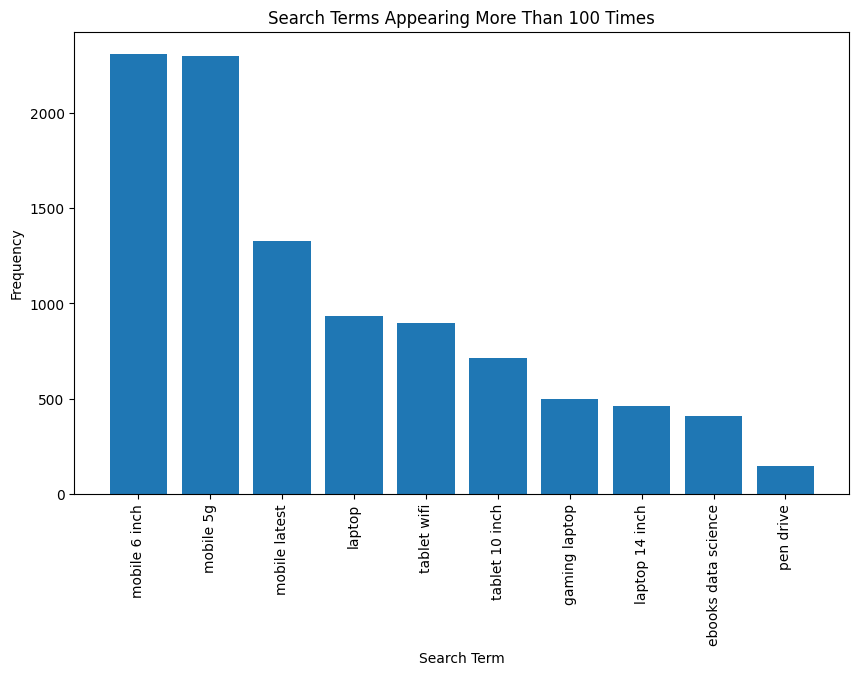

In [17]:
import matplotlib.pyplot as plt

pd_df = popular_terms.toPandas()

plt.figure(figsize=(10,6))
plt.bar(pd_df["searchterm"], pd_df["count"])
plt.xticks(rotation=90)
plt.xlabel("Search Term")
plt.ylabel("Frequency")
plt.title("Search Terms Appearing More Than 100 Times")
plt.show()


# Find average length of search terms

In [18]:
from pyspark.sql.functions import length, avg

avg_length = df.withColumn(
    "term_length", length(col("searchterm"))
).agg(
    avg("term_length").alias("average_length")
)

avg_length.show()


+--------------+
|average_length|
+--------------+
|       11.5519|
+--------------+



<p>This cell calculates the average length of search terms in the dataset.
The length of each search term is computed and then aggregated using the average function.</p>

# 3️ Count search terms grouped by first letter

In [19]:
from pyspark.sql.functions import substring, upper

first_letter_counts = df.withColumn(
    "first_letter", upper(substring(col("searchterm"), 1, 1))
).groupBy("first_letter") \
 .count() \
 .orderBy("first_letter")

first_letter_counts.show()

+------------+-----+
|first_letter|count|
+------------+-----+
|           E|  410|
|           G|  499|
|           L| 1396|
|           M| 5940|
|           P|  144|
|           T| 1611|
+------------+-----+



<p>This cell extracts the first letter of each search term and groups the data based on it.
It then counts how many search terms start with each letter, helping analyze user search patterns.</p>

In [20]:
from pyspark.sql.functions import substring, upper

df.select(
    upper(substring("searchterm", 1, 1)).alias("first_letter")
).distinct().count()


6

# Count how many times gaming laptop was searched

In [21]:
gaming_laptop_count = df.filter(
    col("searchterm") == "gaming laptop"
).count()

print("'gaming laptop' was searched", gaming_laptop_count, "times")


'gaming laptop' was searched 499 times


<p>This cell filters the dataset to include only the search term “gaming laptop”.
It then counts how many times this term appears in the dataset.</p>